In [2]:
import pandas as pd
import numpy as np

## Add knowledge chain length to one_dataset_v2

In [60]:
df = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_complete.csv')

In [61]:
df.columns

Index(['Unnamed: 0', 'title', 'authors', 'n_citation', 'doi', 'url', 'pdf',
       'conf', 'fos', 'year', 'pool', 'topic', 'labels', 'bib name', 'dIDs',
       'ddIDs', 'kc len', 'ref int', 'semantic score', 'base heats',
       'der heats', 'ref int d_dd', 'sim L1', 'sim L2', 'derofder heats'],
      dtype='object')

In [53]:
cols = df.columns
un = [x for x in cols if 'Unnamed' in x]

df = df.drop(un,axis=1)

In [ ]:
df.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_v2.csv',index=False)

In [4]:
kc_len = []
dID = list(df['dIDs'])

for did in dID:
  if(isinstance(did,float)):
    kc_len.append('')
  else:
    did = did.split(' #;# ')
    kc_len.append(len(did))

In [ ]:
df['kc len'] = kc_len
df.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_v2.csv',index=False)

## add ref intersection scores to one_dataset_v2

In [ ]:
refint_dict = dict()

def add_to_dict(path,d):
  df = pd.read_csv(path)

  for index,row in df.iterrows():
    d[row['names']] = row['ref']

  return d

In [ ]:
path = '/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/ref_int(b_d)_poolA.csv'
refint_dict = add_to_dict(path,refint_dict)
len(refint_dict)

1768

In [ ]:
path = '/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/ref_int(b_d)_poolB.csv'
refint_dict = add_to_dict(path,refint_dict)
len(refint_dict)

4440

In [ ]:
path = '/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/ref_int(b_d)_poolC.csv'
refint_dict = add_to_dict(path,refint_dict)
len(refint_dict)

5407

In [ ]:
def clean(name):
  to_remove = ['-',',',':',';','.','?','(',')','/']
  name = name.lower()
  name = name.strip()

  for char in to_remove:
    name = name.replace(char,'')
  name = name.replace('&','and')

  return(name)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_v2.csv')
names = list(df['title'])
refint = []

for t in names:
  refint.append(refint_dict.get(clean(t),'[]'))

df['ref int'] = refint
df.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_v2.csv')

In [ ]:
def make_list(s):
  s = s.split('[')[1]
  s = s.split(']')[0]
  s = s.split(', ')

  if (s[0]==''):
    return([])
  else:
    s = [float(x) for x in s]
    return(s)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_v2.csv')
count = 0
indices = []
ref2 = []

for index,row in df.iterrows():
  if(row['kc len']!=np.nan):
    # try:
      s = make_list(row['ref int'])
      if(row['kc len']==len(s)):
        count+=1
        indices.append(index)
        ref2.append(s)
      else:
        ref2.append('')
print(count)

df['ref int'] = ref2
df.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_v2.csv',index=False)

1259


## add heats

In [69]:
df_heat = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/Influence_score/Result.csv')

heat_map = dict()

def clean_rowstr(l):
  r = [clean(x) for x in l]
  return(r)

def clean(s):
  s = s.strip()
  s = s.replace('\n','')
  s = s.replace("'",'')

  return(s)

def make_list(string,spl = ' #;# ',Type = ''):
  if(isinstance(string,str)):
    string = string.split(spl)
    if(Type!=''):
      string = [Type(x) for x in string]
  else:
    string = []
  return(string)

def get_heats_in_order(row,heats):
  base_ID = row['Unnamed: 0']
  df = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/Influence_score/adj_mat/'+str(base_ID)+'.csv')

  paps = []
  for p in list(df.columns)[1:]:
    if('Unnamed: ' not in p):
      paps.append(p)
    else:
      paps.append('')

  d_len = row['kc len']


  assert(len(paps)==len(heats))

  heat_dict = dict()
  for i in range(len(paps)):
    heat_dict[paps[i]] = heats[i]
  heat_dict[''] = 0

  ders = row['dIDs'].split(' #;# ')
  ders = [clean(x) for x in ders]

  dders = row['ddIDs'].split(' #;# ')
  dders = [x.split(' #$# ') for x in dders]
  dders = [clean_rowstr(x) for x in dders]

  der_heat = []
  dder_heat = []

  for d in ders:
    der_heat.append(heat_dict[d])

  der_heat = [str(x) for x in der_heat]
  der_heat = ' #;# '.join(der_heat)

  for r in dders:
    a = []
    for dd in r:
      a.append(heat_dict[dd])
    a = [str(x) for x in a]
    dder_heat.append(' #$# '.join(a))
  dder_heat = ' #;# '.join(dder_heat)

  return(der_heat,dder_heat)
  

def get_heats(s):
  s = s.split('[')[1]
  s = s.split(']')[0]
  s = s.split()

  s = [float(x) for x in s]
  return(s)

for index,row in df_heat.iterrows():
  try:
    heat_map[row['Article_ID']] = get_heats(row['Heat_values'])
  except:
    print(row['Heat_values'])
    break

In [57]:
der_heats = []
base_heats = []
derofder_heats = []

for index,row in df.iterrows():
  h = heat_map.get(row['Unnamed: 0'],[])
  l = row['kc len']
  if(len(h)>0 and l!=np.nan):
    base_heats.append(l)

    d,dd = get_heats_in_order(row,h)

    der_heats.append(d)
    derofder_heats.append(dd)
  else:
    base_heats.append('')
    der_heats.append('')
    derofder_heats.append('')

len(derofder_heats)

1258

In [58]:
df['base heats'] = base_heats
df['der heats'] = der_heats
df['derofder heats'] = derofder_heats
df.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_complete.csv',index=False)

## Compute the score

In [ ]:
df = df.drop(['semantic score'],axis=1)

In [59]:
d_venscore = dict()
df_ven = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/Venue/metrics.csv')

for index,row in df_ven.iterrows():
  d_venscore[row['venue']] = row['Norm H5-index']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_complete.csv')

scores = []

def make_list(string,spl = ' #;# ',Type = ''):
  if(isinstance(string,str)):
    string = string.split(spl)
    if(Type!=''):
      try:
        string = [Type(x) for x in string]
      except:
        print('$',string)
        string = [0]
  else:
    string = []
  return(string)

def score(heats1,sim1,heats2,sim2,base_heat,base_ven_score,alpha1 = 1,alpha2 = 0.5,alpha3 = 0.25):
  s = 0
  count = 0
  for i in range(len(heats1)):
    h = min(heats1[i],base_heat)
    val = h*sim1[i]
    if(val!=0):
      count+=1
    s+=val
  if(count!=0):
    s = s/count
  else:
    print(';;;',s)

  s2 = 0
  count_outer = 0
  for i in range(len(heats2)):
    heats = heats2[i]
    sims = sim2[i]
    count = 0
    sloop = 0
    for j in range(len(heats)):
      val = min(heats[j],base_heat)*sims[j]
      if(val!=0):
        count+=1
      sloop+=val
    if(count!=0):
      sloop = sloop/count
    else:
      print('[[[',sloop)
    if(sloop!=0):
      count_outer+=1
    s2+=alpha3*sloop
  if(count_outer!=0):
    s2 = s2/count_outer
  else:
    print(s2)    

  s = (alpha1*s)+(alpha2*s2)

  s+=base_heat*base_ven_score

  return(s)

for index,row in df.iterrows():
  print(index)
  if(isinstance(row['sim L1'],float) or isinstance(row['der heats'],float) 
    or isinstance(row['sim L2'],float) or isinstance(row['derofder heats'],float)):
    scores.append(-1)
    continue

  heats1 = make_list(row['der heats'],Type=float)
  sims1 = make_list(row['sim L1'],Type=float)

  heats2 = make_list(row['derofder heats'])
  heats2 = [make_list(x,' #$# ',Type=float) for x in heats2]
  sims2 = make_list(row['sim L2'])
  sims2 = [make_list(x,' #$# ',Type=float) for x in sims2]

  venue = row['conf']

  if(len(sims1)==len(heats1) and len(sims2)==len(heats2)):
    base_heat = float(row['base heats'])
    scores.append(score(heats1,sims1,heats2,sims2,base_heat,d_venscore[venue]))
  else:
    scores.append(-1)

len(scores)

In [106]:
df['semantic score'] = scores
df.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_complete2_norm_3wts.csv',index=False)

In [ ]:
len(scores)-scores.count(-1)

1258

In [ ]:
df2 = df[df['semantic score']!=-1]
len(df2)

1258

In [ ]:
df2.columns

Index(['title', 'authors', 'n_citation', 'doi', 'url', 'pdf', 'conf', 'fos',
       'year', 'pool', 'topic', 'labels', 'bib name', 'dIDs', 'ddIDs',
       'kc len', 'ref int', 'semantic score', 'base heats', 'der heats'],
      dtype='object')

In [ ]:
df2 = df2.drop(['doi','url','pdf','bib name','topic'],axis=1)

In [ ]:
df2.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/Semantic scores/scores_dataset.csv',index=False)

## Separating pool scores

In [4]:
df = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_complete2_norm_3wts.csv')

df_ml = df[df['labels']=='ml']
# df_ml = df_ml.drop(['topic','bib name','pdf'],axis=1)

df_mo = df[df['labels']=='mo']
# df_mo = df_mo.drop(['topic','bib name','pdf'],axis=1)

df_dl = df[df['labels']=='dl']
# df_dl = df_dl.drop(['topic','bib name','pdf'],axis=1)

In [5]:
df_ml.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/Semantic scores/ML.csv',index=False)

In [6]:
df_mo.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/Semantic scores/MO.csv',index=False)
df_dl.to_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/Semantic scores/DL.csv',index=False)

## Looking at data

In [94]:
df1 = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_complete.csv')
df2 = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_complete2.csv')

s1 = list(df1['semantic score'])
s2 = list(df2['semantic score'])

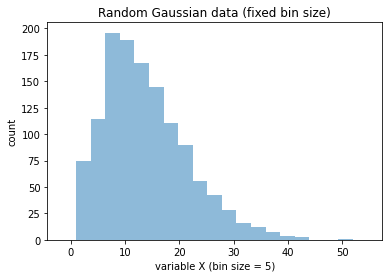

In [97]:
%matplotlib inline
import numpy as np
import random
from matplotlib import pyplot as plt
import math

# data = np.random.normal(0, 20, 1000) 
data = s1

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   20) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

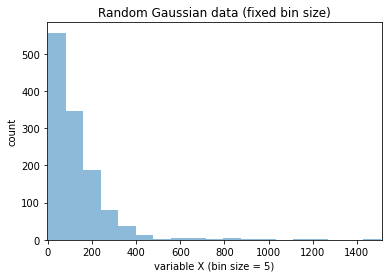

In [98]:
data = s2

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   20) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()